In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
from windrose import WindroseAxes
from scipy.stats import f_oneway, kruskal
# Suppress only FutureWarnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

### Load each country’s cleaned CSV (data/benin_clean.csv, etc.) locally.


In [2]:
df_benin = pd.read_csv("../data/benin-malanville_clean.csv")
df_sierraleone = pd.read_csv("../data/sierraleone-bumbuna_clean.csv")
df_togo = pd.read_csv("../data/togo-dapaong_qc_clean.csv")

## Metric Comparison


##### Boxplots of GHI, DNI, DHI side-by-side (one plot per metric, colored bycountry)

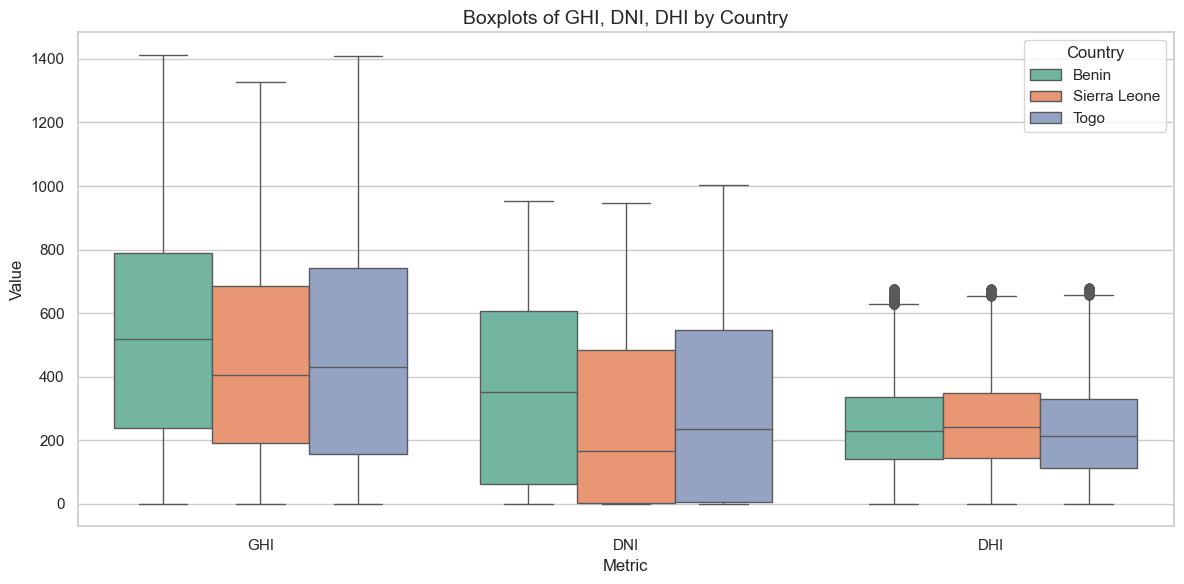

In [3]:
# Add a 'Country' column to each
df_benin["Country"] = "Benin"
df_sierraleone["Country"] = "Sierra Leone"
df_togo["Country"] = "Togo"

# Combine all data into one DataFrame
df_all = pd.concat([df_benin, df_sierraleone, df_togo], ignore_index=True)

# Keep only the relevant columns
cols = ["Country", "GHI", "DNI", "DHI"]
df_plot = df_all[cols].melt(id_vars="Country", var_name="Metric", value_name="Value")

# Set style
sns.set(style="whitegrid", palette="Set2")

# Plot boxplots side-by-side for each metric, colored by country
plt.figure(figsize=(12, 6))
sns.boxplot(x="Metric", y="Value", hue="Country", data=df_plot)
plt.title("Boxplots of GHI, DNI, DHI by Country", fontsize=14)
plt.xlabel("Metric")
plt.ylabel("Value")
plt.legend(title="Country")
plt.tight_layout()
plt.show()

### Explanation

- **`melt()`** reshapes the dataset so multiple metrics (**GHI**, **DNI**, **DHI**) can be visualized together in a single plot.  
- Each **boxplot** represents the distribution of a specific metric for each **country**.  
- The **colors** distinguish between the three countries: **Benin**, **Sierra Leone**, and **Togo**.


### Purpose of the Metric Comparison

- To **compare the solar resource distribution** (GHI, DNI, DHI) between **Benin**, **Sierra Leone**, and **Togo**.  
- To **identify differences in solar intensity and variability** across locations.  
- To **detect outliers or data quality issues**, as boxplots reveal data spread and extreme values.  
- To **understand the solar potential** of each country — higher median **GHI** or **DNI** indicates stronger solar irradiance suitable for solar energy development.


##### Summary Table comparing mean, median, and standard deviation of GHI,DNI, and DHI across countries.

In [4]:
# Metrics to summarize
metrics = ["GHI", "DNI", "DHI"]

# Create summary table
summary = (
    df_all.groupby("Country")[metrics]
    .agg(["mean", "median", "std"])
    .round(2)
)

# Display the summary
summary

GHI                    DNI                    DHI         \
                mean median     std    mean median     std    mean median   
Country                                                                     
Benin         513.44  520.0  304.51  356.80  353.0  279.58  247.25  227.8   
Sierra Leone  444.21  404.8  293.24  256.07  165.7  263.11  250.82  242.2   
Togo          454.07  430.2  318.60  296.30  234.2  283.08  228.29  211.8   

                      
                 std  
Country               
Benin         142.88  
Sierra Leone  140.32  
Togo          149.59

In [7]:
# Extract GHI data by country
ghi_benin = df_benin["GHI"]
ghi_sierraleone = df_sierraleone["GHI"]
ghi_togo = df_togo["GHI"]

# --- One-way ANOVA ---
anova_stat, anova_p = f_oneway(ghi_benin, ghi_sierraleone, ghi_togo)

# --- Kruskal–Wallis test (non-parametric alternative) ---
kruskal_stat, kruskal_p = kruskal(ghi_benin, ghi_sierraleone, ghi_togo)

print("One-way ANOVA: F-statistic =", round(anova_stat, 3), ", p-value =", round(anova_p, 5))
print("Kruskal–Wallis: H-statistic =", round(kruskal_stat, 3), ", p-value =", round(kruskal_p, 5))

One-way ANOVA: F-statistic = 3676.928 , p-value = 0.0
Kruskal–Wallis: H-statistic = 7725.279 , p-value = 0.0


## Statistical Testing – GHI Differences Across Countries

To evaluate whether **GHI (Global Horizontal Irradiance)** differs significantly between **Benin**, **Sierra Leone**, and **Togo**, both a **one-way ANOVA** and a **Kruskal–Wallis test** were performed.

#### 🔹 Results:
- **One-way ANOVA:** F-statistic = 3676.93, p-value = 0.000  
- **Kruskal–Wallis:** H-statistic = 7725.28, p-value = 0.000  

#### 🔹 Interpretation:
- Both tests yield **p-values ≈ 0.0 (< 0.05)**, indicating that the **differences in GHI between the three countries are highly statistically significant**.  
- This means the **mean GHI levels vary significantly** across **Benin**, **Sierra Leone**, and **Togo**.  
- In practical terms, the countries **do not share the same solar irradiance patterns**, and these differences are **unlikely due to random variation**.  

#### 🔹 Summary:
Benin, Sierra Leone, and Togo exhibit **distinct solar resource characteristics**, confirming that **location strongly influences GHI levels** in this dataset.


## Key Observations

- **Benin** → Exhibits the **highest solar potential**, with strong and consistent irradiance (high GHI and DNI values).  
- **Togo** → Shows **moderate solar potential**, offering balanced sunlight levels with relatively stable conditions.  
- **Sierra Leone** → Experiences **lower direct irradiance** and **more diffuse radiation**, likely due to higher cloud cover or humidity.  
- The **standard deviation values** indicate varying levels of sunlight stability — important to consider when designing solar systems (e.g., for storage or sizing).  


## (Bonus) Visual Summary

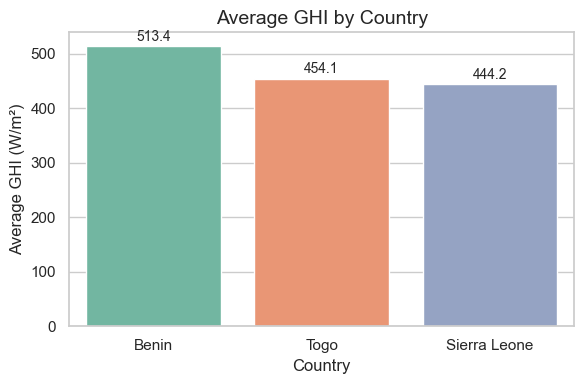

In [13]:
# Compute mean GHI per country
ghi_mean = df_all.groupby("Country")["GHI"].mean().sort_values(ascending=False)

# Plot bar chart
plt.figure(figsize=(6,4))
sns.barplot(x=ghi_mean.index, y=ghi_mean.values, palette="Set2")
plt.title("Average GHI by Country", fontsize=14)
plt.ylabel("Average GHI (W/m²)")
plt.xlabel("Country")
for i, val in enumerate(ghi_mean.values):
    plt.text(i, val + 10, f"{val:.1f}", ha='center', fontsize=10)
plt.tight_layout()
plt.show()